### Importing the required libraries

In [ ]:
## importing libraries and warning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import plotly.express as px


warnings.filterwarnings("ignore")

%matplotlib inline

### Importing the data

In [ ]:
## Importing the data
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['bank-full.csv']), delimiter=';')

### Exploring the data

In [ ]:
df.head(5)

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.shape

(45211, 17)

In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df['contact'].unique()


array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

Observations:


*   There are 45211 records with 17 columns
*   The data loads each columns as int or object datatype
*   There are no null values
*   There are some 'unkown' values in contact and poutcome columns.
*   The columns contact and poutcome are categorical columns where contact:['cellular','telephone'] and poutcome:['failure', 'nonexistent', 'success']



## Checking the number of records that have unknown value in contact and poutcome

In [ ]:
# Find records with 'unknown' values in 'contact' or 'poutcome' columns
unknown_records = df[(df['contact'] == 'unknown') | (df['poutcome'] == 'unknown')]

# Display the records with 'unknown' values
print(unknown_records.shape)

(37029, 17)


In [ ]:
# Finding out the records that have other in poutcome
df[df['poutcome']=='other'].shape

(1840, 17)

In [ ]:
# Converting all the other records in poutcome column to unknown
df['poutcome'].replace('other', 'unknown', inplace=True)

In [ ]:
df[df['poutcome']=='other'].shape

(0, 17)

In [ ]:
unknown_records = df[(df['contact'] == 'unknown')]

# Display the records with 'unknown' values
print(unknown_records.shape)

(13020, 17)


In [ ]:
# Replace 'unknown' with a new category label (e.g., 'missing')
df['contact'] = df['contact'].replace('unknown', 'missing')
df['poutcome'] = df['poutcome'].replace('unknown', 'missing')

In [ ]:
unknown_records = df[(df['contact'] == 'unknown') | df['poutcome']=='unknown']

# Display the records with 'unknown' values
print(unknown_records.shape)

(0, 17)


### We have replaced the 'other' value from poutcome with 'unknown' since there were only 1800 records with the data.
#### We have replaced all the 'unknown' value in contact and poutcome column with the label 'missing' because there are close to 37k records that had 'unknown' value.

In [ ]:
df['poutcome'].unique()

array(['missing', 'failure', 'success'], dtype=object)

In [ ]:
df['contact'].unique()

array(['missing', 'cellular', 'telephone'], dtype=object)

In [ ]:
df['pdays'].isna().sum()

0

In [ ]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        3
y               2
dtype: int64

In [ ]:
## Check duplicates in dataframe
df.duplicated().sum()

0

In [ ]:
df.shape

(45211, 17)

In [ ]:
### segrregate numerical and categorical features
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']

In [ ]:
numerical_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
categorical_feature

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [ ]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

### The dataset is heavily imbalanced with 'no' data as a majority. After oversampling the data with equal data for yes and no we will analyze and visualize the data

### Oversampling can be done using 2 methods:


*   SMOTE
*   RandomOverSampler



In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [ ]:
# Separate features and target
X = df.drop('y', axis=1)
y = df['y']
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df_preprocessed = df.copy()

## Label Encoding for SMOTE

In [ ]:
### Converting categorical to numeric (Lable encoder)

# Create a label encoder
encoder = LabelEncoder()

# Encode the categorical variables in the DataFrame
for col in df.select_dtypes(include='object').columns:
    df[col] = encoder.fit_transform(df[col])

## Performing SMOTE

In [ ]:
oversample=SMOTE()
df.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        1   
1   44    9        2          1        0       29        1     0        1   
2   33    2        1          1        0        2        1     1        1   
3   47    1        1          3        0     1506        1     0        1   
4   33   11        2          3        0        1        0     0        1   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8       261         1     -1         0         1  0  
1    5      8       151         1     -1         0         1  0  
2    5      8        76         1     -1         0         1  0  
3    5      8        92         1     -1         0         1  0  
4    5      8       198         1     -1         0         1  0

In [ ]:
X_resampled,y_resampled = oversample.fit_resample(df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']], df['y'])

In [ ]:
X_resampled.shape

(79844, 16)

In [ ]:
X_resampled['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88, 91])

In [ ]:
X_resampled.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [ ]:
df_final = pd.DataFrame(X_resampled )

In [ ]:
df_final['y'] = y_resampled

In [ ]:
df_final.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        1   
1   44    9        2          1        0       29        1     0        1   
2   33    2        1          1        0        2        1     1        1   
3   47    1        1          3        0     1506        1     0        1   
4   33   11        2          3        0        1        0     0        1   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8       261         1     -1         0         1  0  
1    5      8       151         1     -1         0         1  0  
2    5      8        76         1     -1         0         1  0  
3    5      8        92         1     -1         0         1  0  
4    5      8       198         1     -1         0         1  0

In [ ]:
df_final.shape

(79844, 17)

## Oversampling using RandomOverSampler for visualizations

In [ ]:

# Resample as before
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)

# Impute missing values
imputer = SimpleImputer(strategy='most_frequent')
X_resampled = imputer.fit_transform(X_resampled)

# Convert X_res back to DataFrame
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)

# Combine resampled X and y
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)
print(df_resampled.shape)
print(df_resampled['y'].value_counts())

(79844, 17)
no     39922
yes    39922
Name: y, dtype: int64


## Data Visualization and finding insights

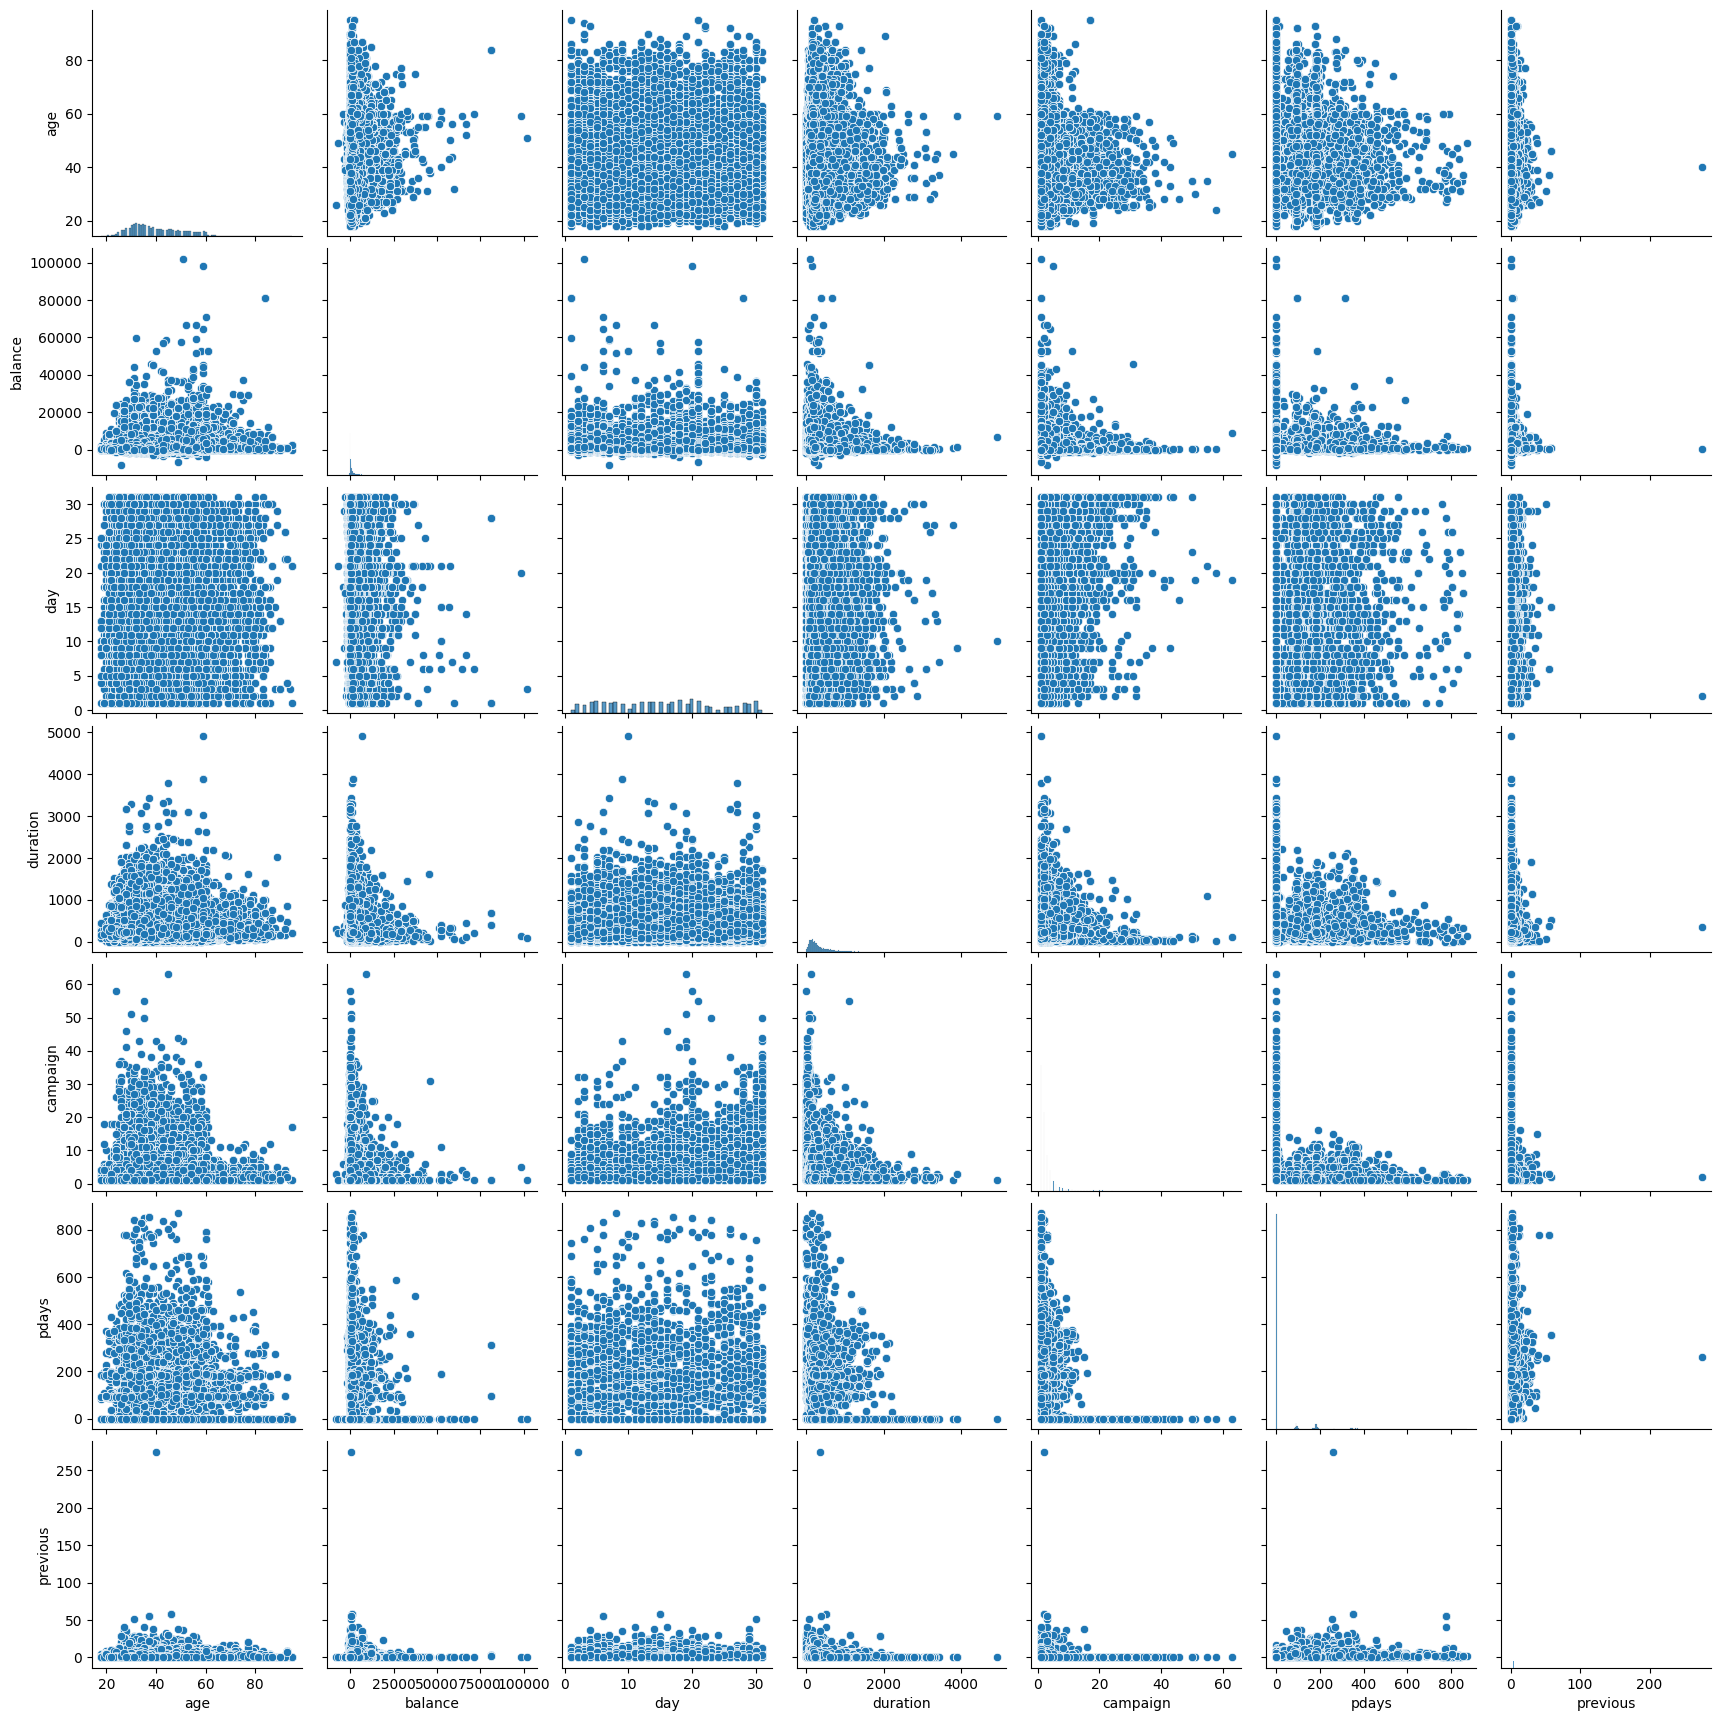

In [ ]:
sns.pairplot(df_resampled)

In [ ]:
df_resampled.describe()

age         job  marital  education default  balance housing   loan  \
count   79844       79844    79844      79844   79844    79844   79844  79844   
unique     77          12        3          4       2     7168       2      2   
top        32  management  married  secondary      no        0      no     no   
freq     3545       17986    45077      39243   78696     5392   42001  69433   

         contact    day  month  duration  campaign  pdays  previous poutcome  \
count      79844  79844  79844     79844     79844  79844     79844    79844   
unique         3     31     12      1573        48    559        41        3   
top     cellular     20    may       158         1     -1         0  missing   
freq       57920   3987  19845       249     34364  58993     58993    62774   

            y  
count   79844  
unique      2  
top        no  
freq    39922

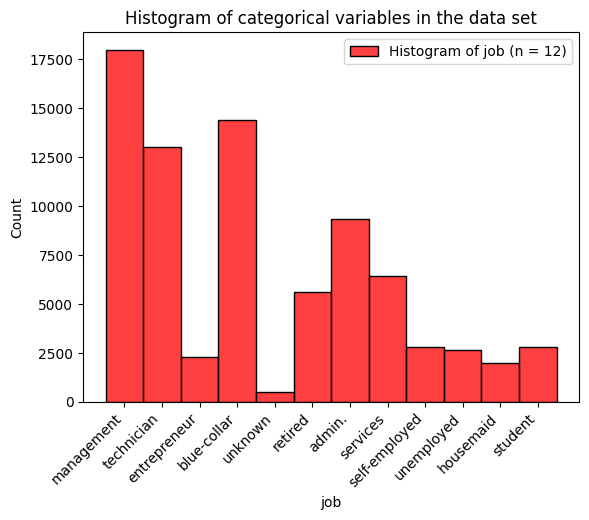

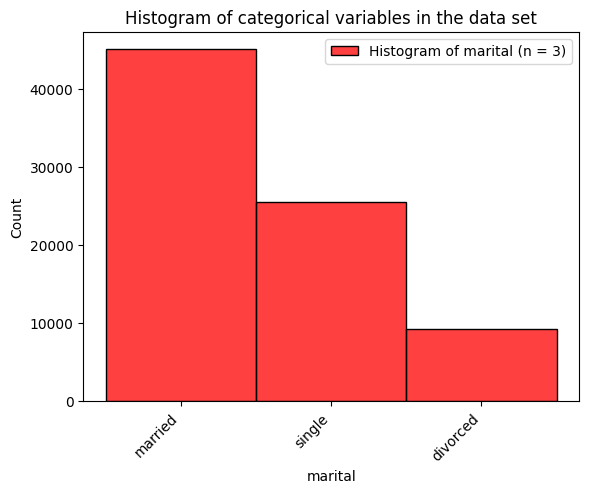

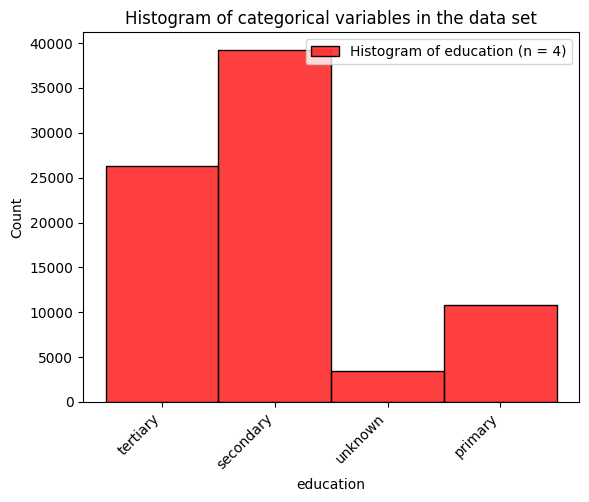

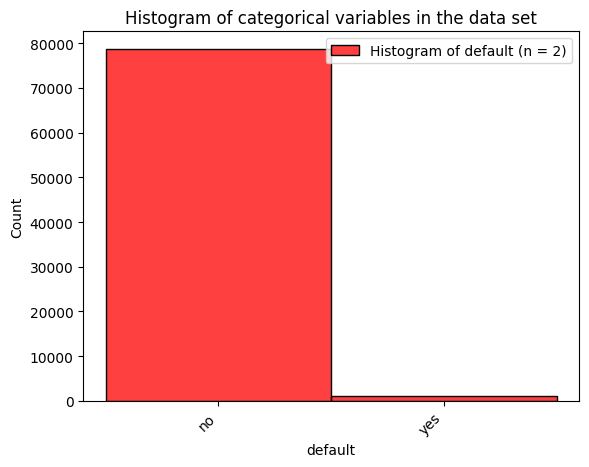

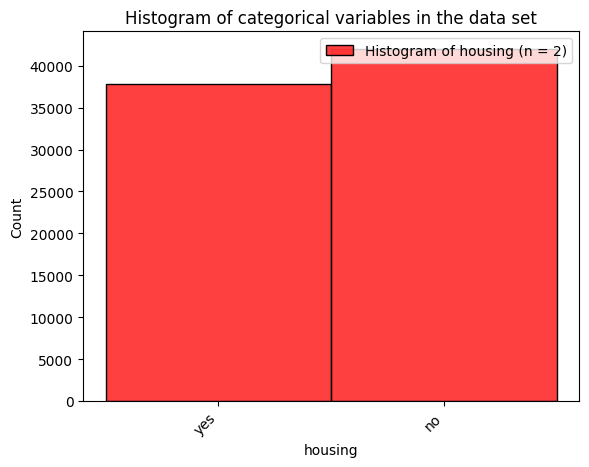

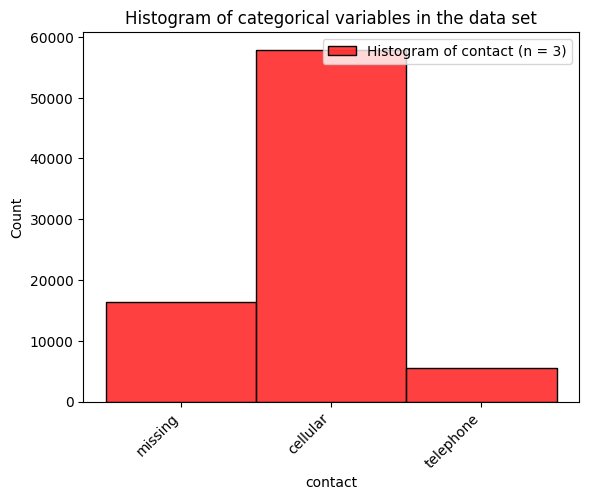

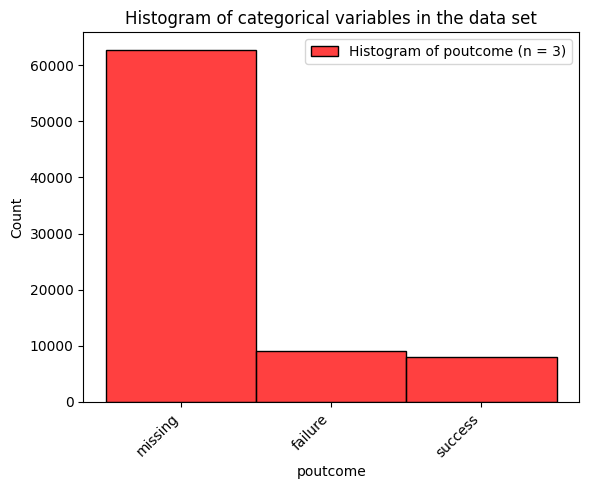

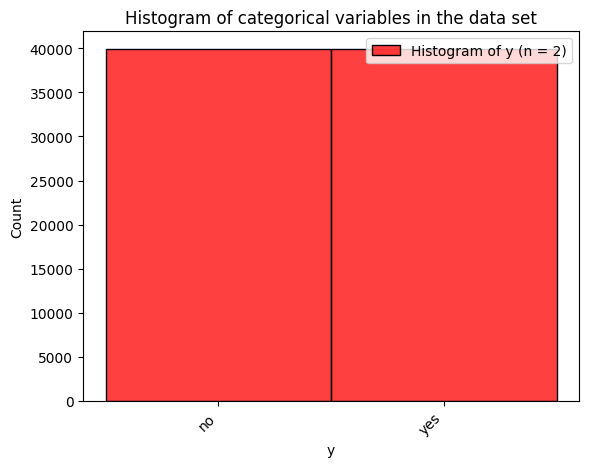

In [ ]:
for col in categorical_feature:
    label = f'Histogram of {col} (n = {df_resampled[col].nunique()})'

    # Create the histogram plot
    sns.histplot(df_resampled[col], label=label,color='red')

    # Rotate the x-axis labels
    plt.xticks(rotation=45, ha='right')

    # Add a legend
    plt.legend()

    # Set the title of the plot
    plt.title('Histogram of categorical variables in the data set')

    # Show the plot
    plt.show()

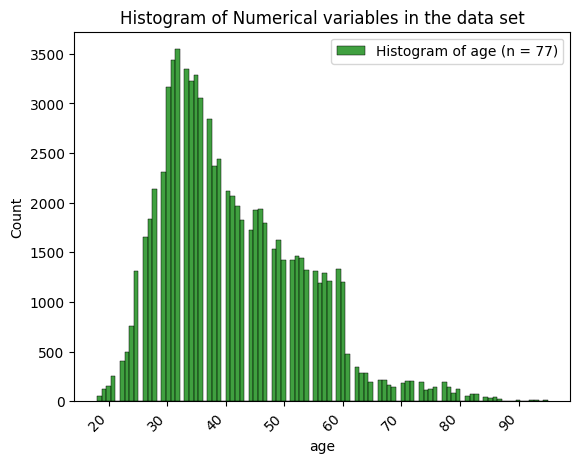

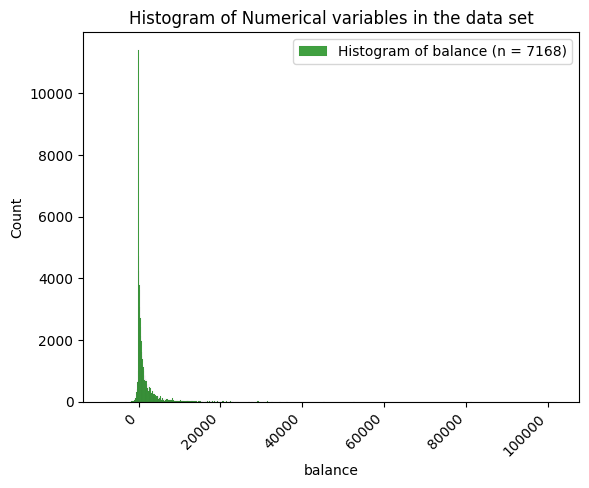

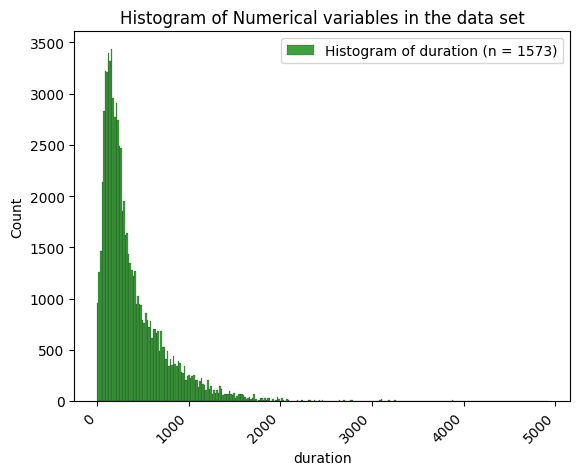

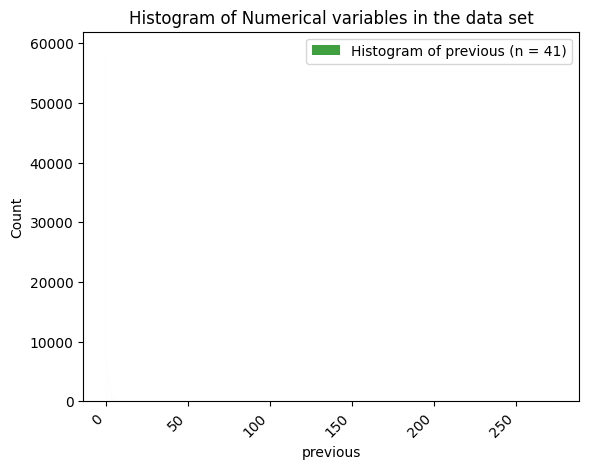

In [ ]:
for col in numerical_features:
    label = f'Histogram of {col} (n = {df_resampled[col].nunique()})'

    # Create the histogram plot
    sns.histplot(df_resampled[col],label=label,color='green')

    # Rotate the x-axis labels
    plt.xticks(rotation=45, ha='right')

    # Add a legend
    plt.legend()

    # Set the title of the plot
    plt.title('Histogram of Numerical variables in the data set')

    # Show the plot
    plt.show()

In [ ]:
numerical_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
categorical_feature

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [ ]:
df_resampled['poutcome'].unique()

array(['missing', 'failure', 'success'], dtype=object)

In [ ]:
df_resampled.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Now we have balanced the yes and no category of our target variable and can begin with the analysis of data.
## Analyzing pattern for deposits based on the Job

In [ ]:
df_resampled['job'].describe()

count          79844
unique            12
top       management
freq           17986
Name: job, dtype: object

In [ ]:
df_resampled['job'].value_counts()

management       17986
blue-collar      14403
technician       13028
admin.            9328
services          6447
retired           5611
student           2816
self-employed     2807
unemployed        2631
entrepreneur      2270
housemaid         1993
unknown            524
Name: job, dtype: int64

In [ ]:
sns.histplot(x="job", data=df_resampled, color='green')
plt.xticks(rotation=-45)
plt.show()

In [ ]:
fig = px.pie(df_resampled, values=np.ones(79844), names='job', title='job')
fig.show()

The data has a good amount of information for the blue-collar and the management category people. There are very less amount of information for the student category.

For few records the job type is unknown.

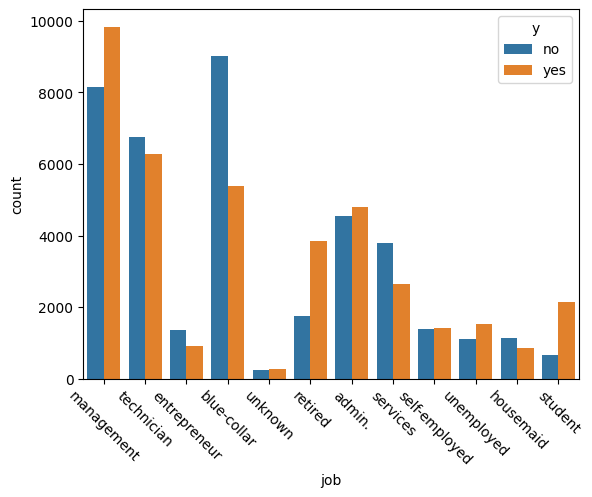

In [ ]:
sns.countplot(x="job", data=df_resampled, hue="y")
plt.xticks(rotation=-45)
plt.show()

**The analysis of the plot highlights distinct patterns in terms of job categories and subscription rates. Notably, customers in management roles and, surprisingly, students show a higher likelihood of subscribing to deposits. However, there is a substantial gap in the conversion rate for individuals in blue-collar professions. To improve overall conversion rates, the bank should prioritize efforts to target and engage blue-collar workers. Currently, this group exhibits the lowest conversion rate among job categories, presenting a clear opportunity for the bank to enhance its marketing strategies and deposit plans tailored to their specific needs.**

# Analyzing deposit pattern based on the age group

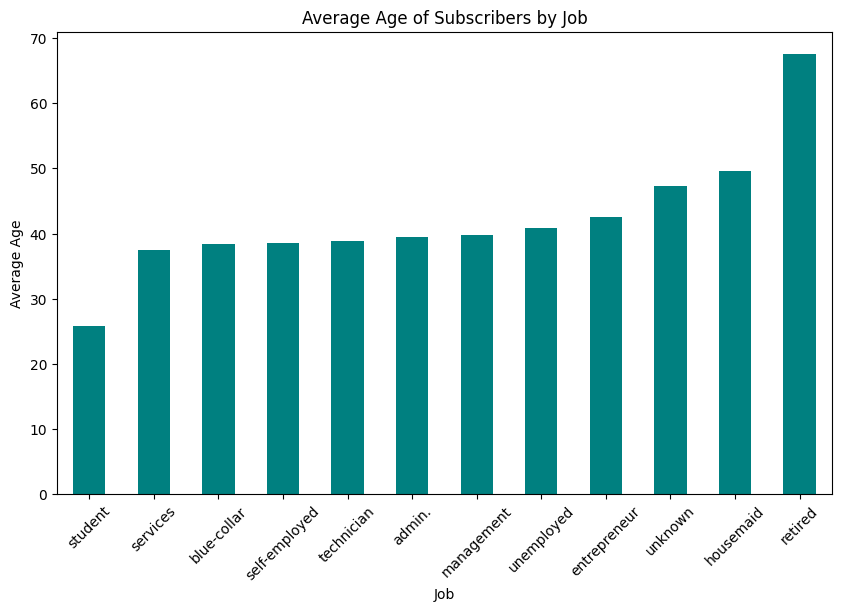

In [ ]:
# Filter the data for subscribers ('y' = 'yes')
subscribers = df_resampled[df_resampled['y'] == 'yes']

average_age_by_job = subscribers.groupby('job')['age'].mean().sort_values()

# Create a bar plot
plt.figure(figsize=(10, 6))
average_age_by_job.plot(kind='bar', color='teal')
plt.title('Average Age of Subscribers by Job')
plt.xlabel('Job')
plt.ylabel('Average Age')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()

In [ ]:
subscribers = df_resampled[df_resampled['y'].isin(['yes', 'no'])]

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
subscribers.pivot_table(index='job', columns='y', values='age', aggfunc='mean').plot(kind='bar', color=['#3498db', '#e74c3c'])
plt.title('Average Age by Job for Subscribers and Non-Subscribers')
plt.xlabel('Job')
plt.ylabel('Average Age')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title='Deposit', labels=['Non-Subscribers', 'Subscribers'])

plt.show()

<Figure size 1200x600 with 0 Axes>



1.  People around the age group of 37-40 are most likely to subscribe to deposits, indicating that this age range may be a key target demographic for deposit-related marketing efforts.

2. In the cases of retired individuals and housemaids, the average age group of the target audience is around 50 and 68 years, respectively. This suggests that these groups are more likely to subscribe to deposits at an older age.

3. Young students who are early in their careers and have just started earning also believe in the product and are making deposits. This demonstrates that there is interest in deposits among younger individuals who are beginning to save and invest.

These insights can be valuable for marketing and targeting strategies when promoting deposit products to different customer segments.




## Analyzing deposit pattern based on martial status

In [ ]:
fig = px.pie(df_resampled, values=np.ones(79844), names='marital', title='marital')
fig.show()

In [ ]:
ax=sns.countplot(x="marital", data=df_resampled, hue="y")
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.show()

This pie chart shows that the Portuguese bank is majorly targetting the married
consumers first and then the customers who are single and the least to the divorced.

**The analysis reveals an interesting insight: the conversion rate for married customers is notably lower compared to single customers. This disparity indicates an opportunity for the bank to develop a targeted strategy to enhance the conversion rate among married customers. Implementing tailored deposit plans or promotional campaigns for this segment may be a promising approach to attract and convert more married customers into term deposit subscribers.**


## Checking if there is a pattern based on the education feature

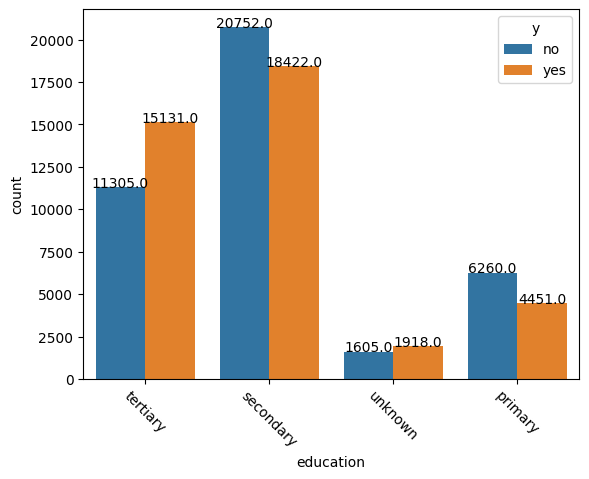

In [ ]:
ax=sns.countplot(x="education", data=df_resampled, hue="y")
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.xticks(rotation=-45)
plt.show()

**The data reveals a notable trend in the influence of education levels on deposit subscription. Customers with post-secondary education (tertiary) exhibit a higher likelihood of subscribing to deposits compared to those with secondary or primary education. This indicates that individuals with higher education levels may have a better understanding of the benefits, leading to a higher subscription rate. Recognizing this educational disparity can be valuable for the bank in tailoring its marketing and educational strategies to reach a broader audience and encourage deposit subscriptions.**

# Analyzing the Default, Housing and Loan vs the Subscription rate parameter since this can be highly related to the conversion rate for the bank.

In [ ]:
df_resampled["default"].value_counts()

no     78751
yes     1093
Name: default, dtype: int64

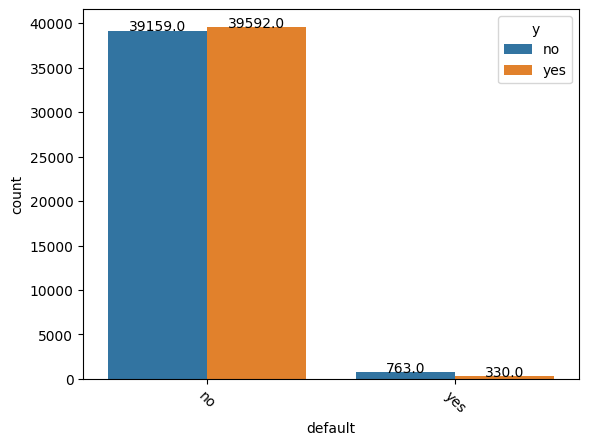

In [ ]:
ax=ax=sns.countplot(x="default", data=df_resampled, hue="y")
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.xticks(rotation=-45)
plt.show()

**The bank's success in targeting customers without defaulted loans is evident from the data, as this segment exhibits a promising conversion rate when it comes to subscribing to deposits. This suggests that the bank's strategy for this group is effective in attracting and retaining customers for deposit subscriptions.**

In [ ]:
ax=ax=sns.countplot(x="housing", data=df_resampled, hue="y")
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.xticks(rotation=-45)
plt.show()

**It's evident that individuals without housing loans are more likely to subscribe compared to those with housing loans. This distinction highlights the impact of housing loan status on subscription behavior.**

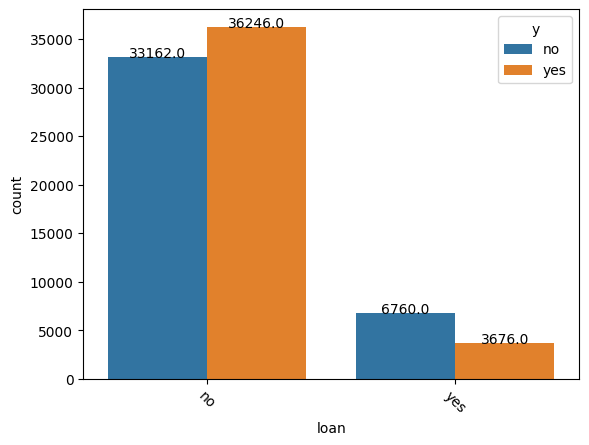

In [ ]:
ax=ax=sns.countplot(x="loan", data=df_resampled, hue="y")
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.xticks(rotation=-45)
plt.show()

**Evidently, customers with no history of defaults, no housing loans, and no personal loans are more likely to subscribe to deposits. This group is more financially stable, as they do not have active loans requiring monthly payments. To boost revenue and increase conversion rates, the bank should prioritize targeting individuals with a good credit score, no loan obligations, and a positive financial outlook. Tailoring marketing strategies and deposit plans to appeal to this segment can lead to improved results**

# Analyzing the subscription rate based on Contact type

In [ ]:
ax=ax=sns.countplot(x="contact", data=df_resampled, hue="y")
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.xticks(rotation=-45)
plt.show()

**Individuals contacted via cellular communication are more likely to subscribe compared to customers contacted via telephone. This highlights the impact of the contact method on subscription behavior.**

# Analyzing based on the poutcome since it has a high impact on the subscription rate of the deposit

Customers with a Successful Previous Campaign (poutcome = "success")

In [ ]:
# Filter data for customers with a successful previous campaign
success_group = df_resampled[df_resampled['poutcome'] == 'success']

# Calculate the subscription rate for this group
success_subscription_rate = (success_group['y'] == 'yes').mean()

In [ ]:
print(f"Subscription rate for customers with a successful previous campaign: {success_subscription_rate:.2%}")


Subscription rate for customers with a successful previous campaign: 93.26%


Customers with a Successful Previous Campaign (poutcome = "failure")

In [ ]:
# Filter data for customers with an unsuccessful previous campaign
failure_group = df_resampled[df_resampled['poutcome'] == 'failure']

# Calculate the subscription rate for this group
failure_subscription_rate = (failure_group['y'] == 'yes').mean()

In [ ]:
print(f"Subscription rate for customers with an unsuccessful previous campaign: {failure_subscription_rate:.2%}")

Subscription rate for customers with an unsuccessful previous campaign: 52.11%


In [ ]:
# Calculate the overall subscription rate
overall_subscription_rate = (df_resampled['y'] == 'yes').mean()
print(f"Overall subscription rate: {overall_subscription_rate:.2%}")

Overall subscription rate: 50.00%


**Upon analyzing the data, it was observed that customers who had a successful outcome in the previous campaign (poutcome = "success") exhibited a notably higher likelihood of subscribing to a term deposit in the current campaign. The subscription rate for this group was approximately 93% compared to the overall subscription rate of 50%. This suggests that past campaign success has a positive impact on the current campaign's success.**

**Conversely, customers who experienced an unsuccessful outcome in the previous campaign (poutcome = "failure") showed a lower likelihood of subscribing in the current campaign. The subscription rate for this group was approximately 52%. This indicates that customers with an unsuccessful past campaign outcome are less likely to subscribe in the current campaign.**




# Conclusion from the Plots:

Analyzing the data with a focus on the combination of these columns reveals an intriguing pattern. We observe that individuals with certain job types, higher education levels, who were contacted through specific communication channels, maintained healthier average yearly balances, had no personal loans, and experienced a successful previous campaign outcome are significantly more likely to subscribe to term deposits.

This insight suggests that a successful marketing strategy for term deposit subscriptions may involve targeting a specific segment of customers with the following characteristics:

**Job Type:** Emphasis should be placed on specific job categories that are more inclined to subscribe. These job categories (management) could be identified based on their job types.

**Education:** Targeting customers with higher education levels (tertiary) might yield higher subscription rates.

**Contact Method:** Customers who were contacted through certain communication channels (e.g., "cellular") may exhibit a higher likelihood of subscription.

**Average Yearly Balance:** Customers with healthier average yearly balances could be an attractive segment for deposit subscription offers.

**Loan Status:** Prioritizing customers without personal loans ("loan" = "no") may lead to improved subscription rates.

**Previous Campaign Outcome:** Individuals who experienced a successful outcome in the previous campaign ("poutcome" = "success") have a higher likelihood of subscribing to deposits in the current campaign.

By customizing marketing strategies and deposit plans to cater to this specific segment of customers, the bank may significantly enhance its conversion rates and overall campaign success.

This unique insight emphasizes the importance of a targeted approach that considers a combination of factors to maximize the chances of customer subscription to term deposits.


In [ ]:
# Plotting the graphs against target variable

# Specify the target variable
target_variable = 'y'

# Create a grid of countplots for all categorical features
plt.figure(figsize=(15, 14))
for i, column in enumerate(categorical_feature, 1):
    plt.subplot(4, 3, i)  # Adjust the number of rows and columns as needed
    sns.countplot(data=df_resampled, x=column, hue=target_variable, palette='Set1')
    plt.title(f'{column} vs. {target_variable}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Data Preparation for Model

## Converting the data generated by Random OverSampler

In [ ]:
### Converting categorical to numeric (Lable encoder)

# Create a label encoder
encoder = LabelEncoder()

# Encode the categorical variables in the DataFrame
for col in df_resampled.select_dtypes(include='object').columns:
    df_resampled[col] = encoder.fit_transform(df_resampled[col])

<Axes: >

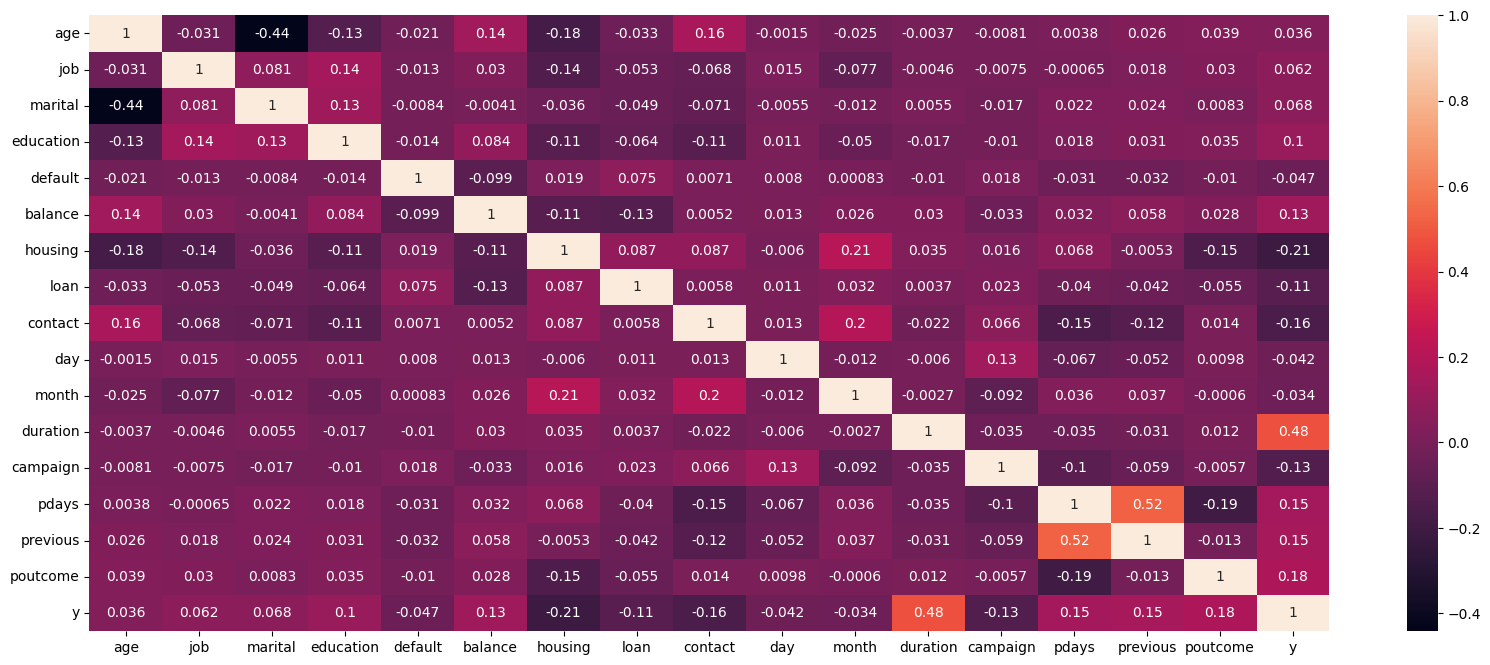

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(df_resampled.corr(),annot =True)

In [ ]:
df_resampled.to_csv('UCIBankingPreprocessedData.csv')
files.download('UCIBankingPreprocessedData.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>